# **종합실습1 이변량분석(y-숫자) : car seat 매출 분석**

* 카시트에 대해서 지역 매장 별 매출액을 예측하고자 합니다.

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

## **1.환경준비**

### **(1) 라이브러리 로딩**

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

### **(2) 데이터 로딩**

|	변수명	|	설명	|	구분	|
|----|----|----|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|
|	Income 	|	 지역 주민 평균 소득	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부	|	feature	|



In [3]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats2.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


In [4]:
target = 'Sales'

* target 때문에 분석한다는 것을 명심!

## **2.숫자형 X --> Y**

In [4]:
def eda_2_nn(data, x, y):
    result = spst.pearsonr(data[x], data[y])
    print(f'r : {result[0]}')
    print(f'pv : {result[1]}')
    sns.scatterplot(x = x, y = y, data = data)
    plt.grid()
    plt.show()

* 모든 숫자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : scatter, jointplot  
② 수치화 : 상관분석

### **(1) Advertising -> Sales**

1) 시각화 : scatter(regplot), jointplot

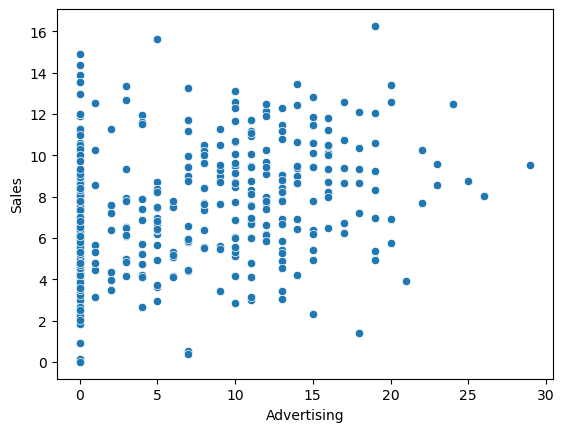

In [4]:
var = 'Advertising'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

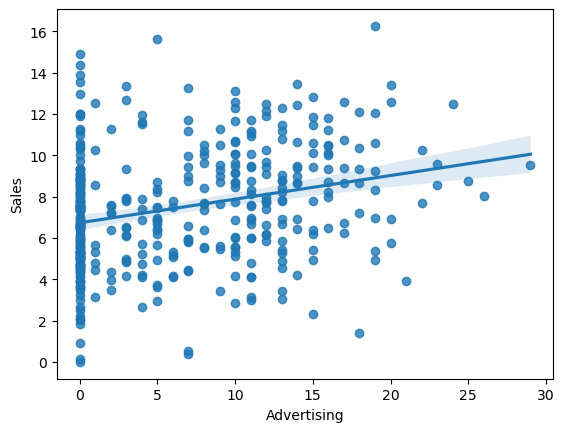

In [5]:
sns.regplot(x=var, y = target, data = data)
plt.show()

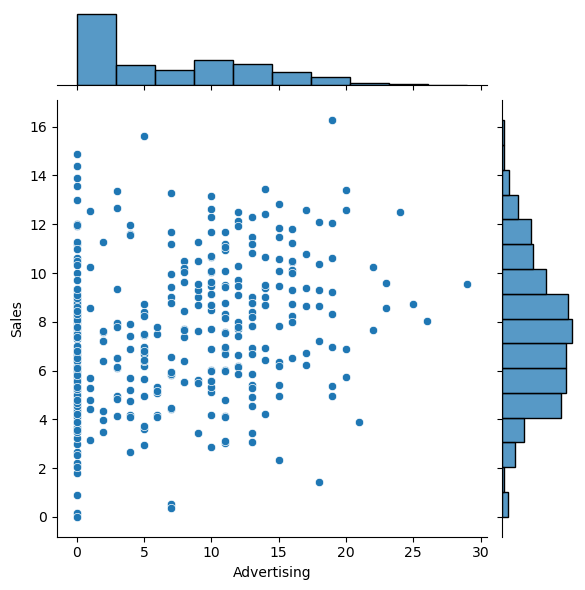

In [6]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [7]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.269506781376902, p-value : 4.3776771103027514e-08


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 광고비와 판매량은 관련이 있다. 그러나 크지 않다.

* 추가 : 광고비 0 빼고 분석해보기

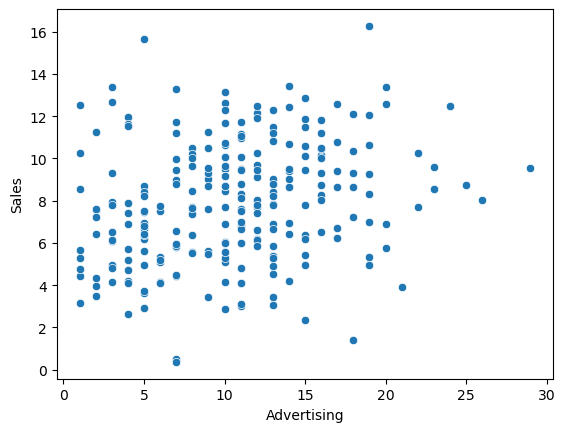

In [8]:
temp = data.loc[data['Advertising'] > 0]
sns.scatterplot(x=var, y = target, data = temp)
plt.show()

In [9]:
result = spst.pearsonr(temp[var], temp[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.2571829256169392, p-value : 3.112672883086058e-05


### **(2) Population -> Sales**

1) 시각화 : scatter(regplot), jointplot

In [7]:
def corr_analysis(x, y, data):
    # plot
    sns.scatterplot(x = x, y = y,
                    data = data)
    
    plt.grid()
    
    sns.jointplot(x = x , y = y,
                  data = data)
    
    plt.grid()
    plt.show()
    
    # pearson r
    print(spst.pearsonr(data[x], data[y]))

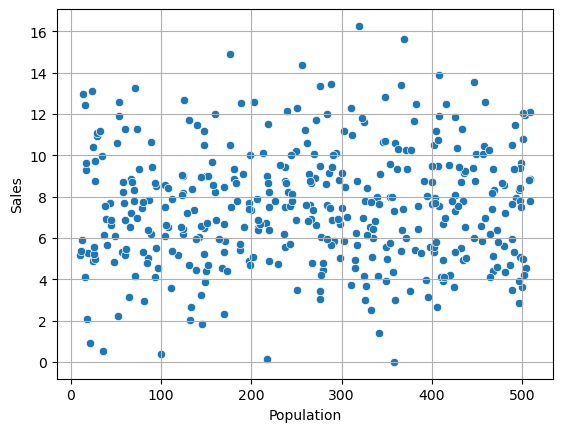

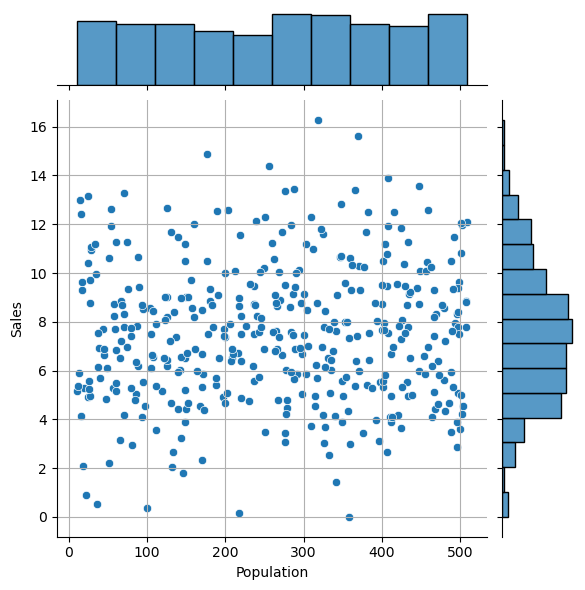

PearsonRResult(statistic=0.0504709844720392, pvalue=0.31398160931904856)


In [24]:
corr_analysis('Population', 'Sales', data)

2) 수치화 : 상관분석

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

In [ ]:
# 상관관계가 거의 없다. 

### **(3) Price -> Sales**

1) 시각화 : scatter(regplot), jointplot

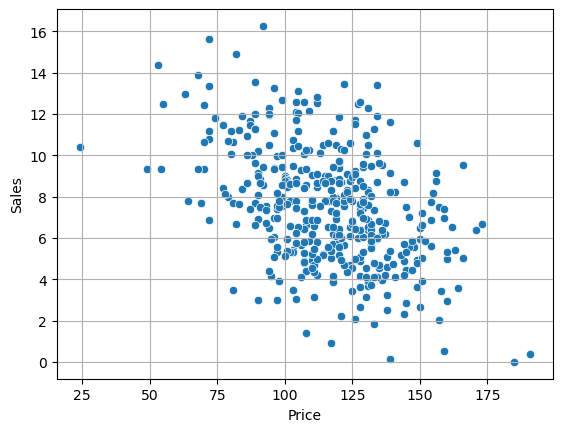

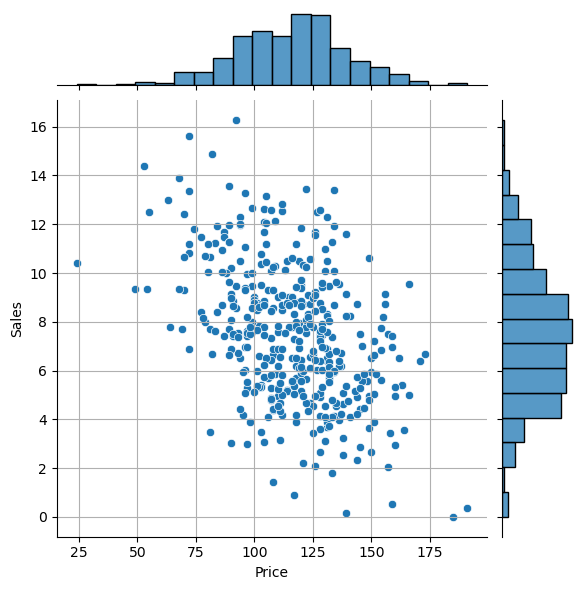

PearsonRResult(statistic=-0.4449507278465726, pvalue=7.618187011913169e-21)


In [26]:
corr_analysis('Price', 'Sales', data)

In [ ]:
# 중간 정도의 음의 상관 관계가 있다.  
# 가격이 높으면 사람들이 잘 사지 않는다는 것을 알 수 있다.
# 판매가와 판매량이 잘 조화되어 Peak를 나타내는 지점이 있다. (약 125, 8 부근)

2) 수치화 : 상관분석

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### **(4) Age -> Sales**

1) 시각화 : scatter(regplot), jointplot

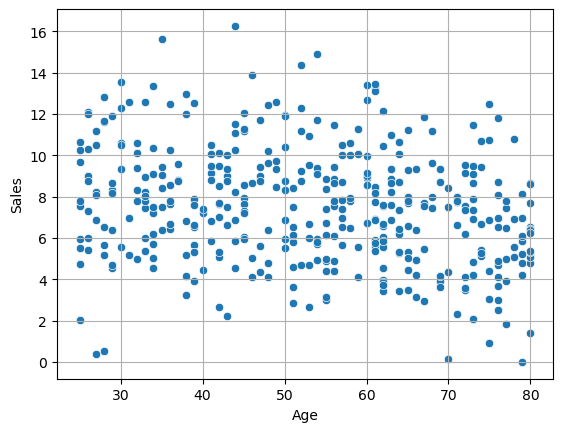

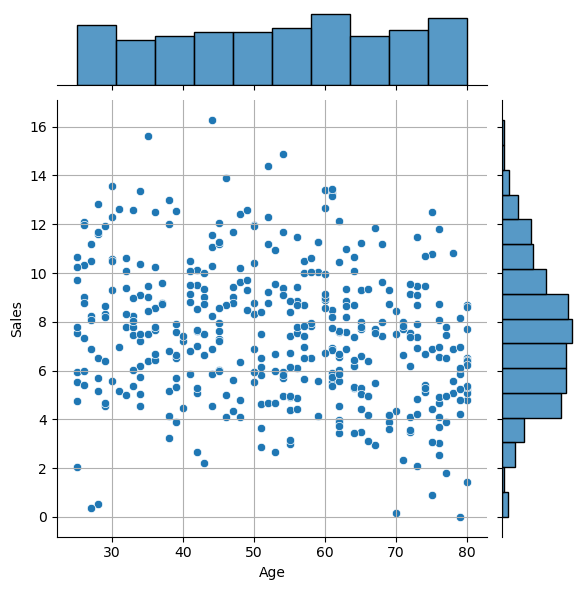

PearsonRResult(statistic=-0.2318154396045765, pvalue=2.7889498393714038e-06)


In [27]:
corr_analysis('Age', 'Sales', data)

In [ ]:
# 약한 음의 상관관계가 있다. 
# 나이가 많을 수록 소비를 더 안하지만, 대체로 비슷하다.
# 그 매장이 있는 지역의 평균 나이들인데 데이터가 조금?

2) 수치화 : 상관분석

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### **(5) CompPrice -> Sales**

1) 시각화 : scatter(regplot), jointplot

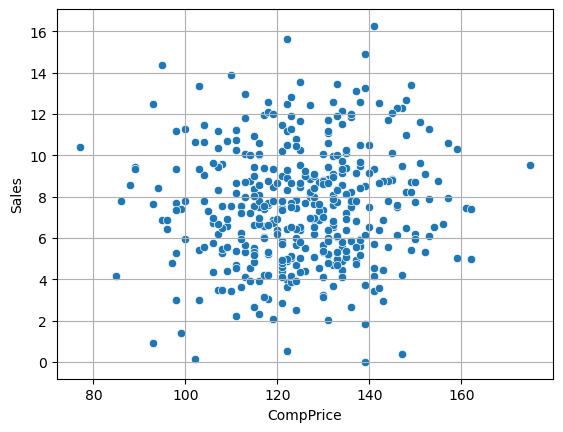

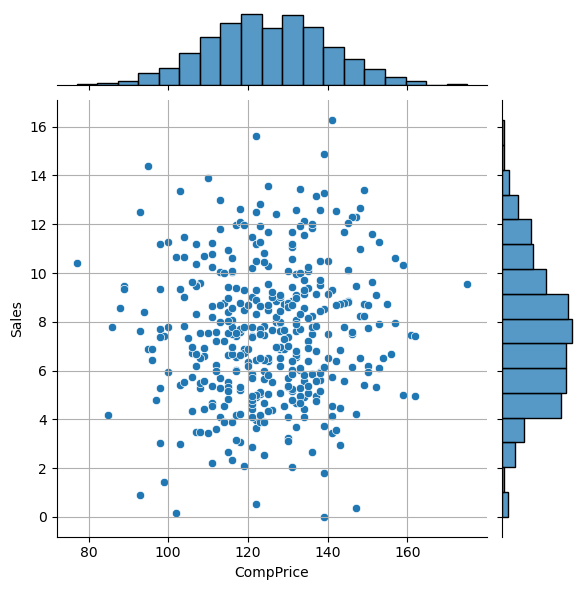

PearsonRResult(statistic=0.06407872955062152, pvalue=0.2009398289418404)


In [28]:
corr_analysis('CompPrice', 'Sales', data)

In [ ]:
# 상관성이 없어 보인다.
# 경쟁사 가격과 우리 판매량이니까 그런 것 같다. 하지만 진짜?

In [5]:
# 가격 차이 = 가격 경쟁력
data['price_diff'] = data['CompPrice'] - data['Price']
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US,price_diff
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes,18
1,11.22,111,48,16,260,83,Good,65,Yes,Yes,28
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes,33
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes,20
4,4.15,141,64,3,340,128,Bad,38,Yes,No,13


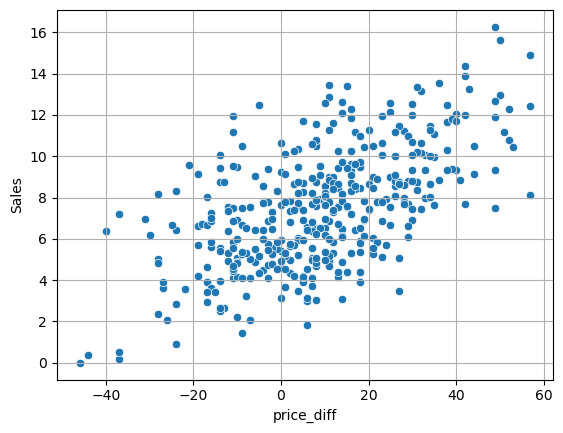

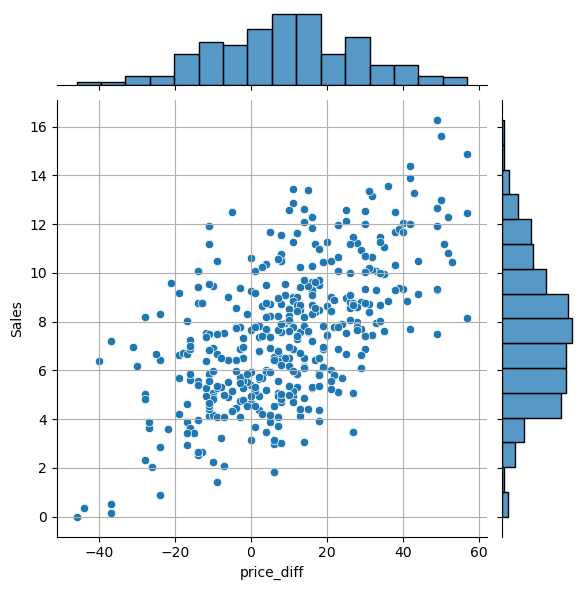

PearsonRResult(statistic=0.5979217124533921, pvalue=3.877120641788767e-40)


In [8]:
corr_analysis('price_diff', 'Sales', data)

In [9]:
# 가격 경쟁력(우리 가격이 쌀 수록 판매량이 늘어난다.를 데이터로 확인해보았다.)

2) 수치화 : 상관분석

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### **(6) Income -> Sales**

1) 시각화 : scatter(regplot), jointplot

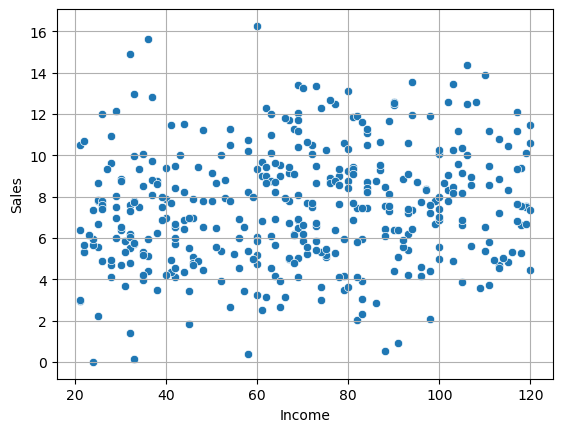

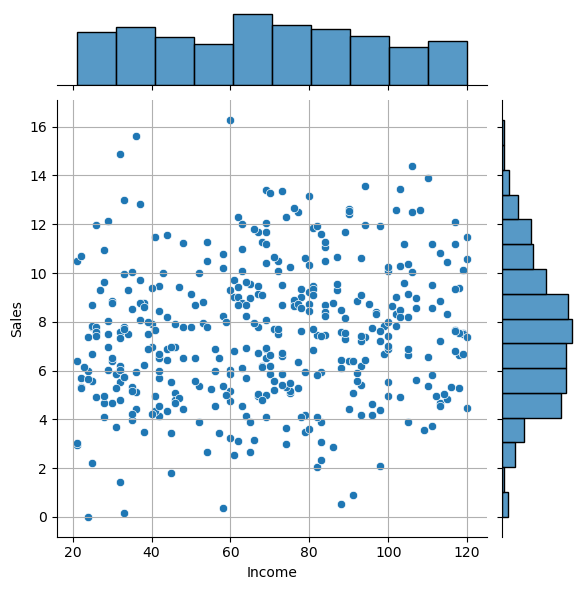

PearsonRResult(statistic=0.15195097946754424, pvalue=0.0023096704539517904)


In [29]:
corr_analysis('Income', 'Sales', data)

In [ ]:
# 약한 양의 상관관계가 있다.
# 수입이 늘어날수록 구매를 더 많이 한다. 그러나 이 역시 미비하다.

2) 수치화 : 상관분석

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

## **3.범주형 X --> Y**

* 모든 범주형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

### **(1) ShelveLoc-> Sales**

1) 시각화 : 평균비교 barplot

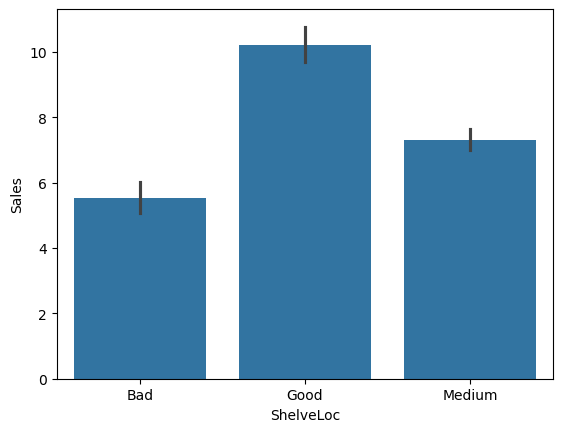

In [5]:
var = 'ShelveLoc'

sns.barplot(x=var, y=target, data = data)
plt.show()

2) 수치화 : t-test, anova

In [6]:
d_b = data.loc[data[var]=='Bad', target]
d_m = data.loc[data[var]=='Medium', target]
d_g = data.loc[data[var]=='Good', target]

spst.f_oneway(d_b, d_m, d_g)

F_onewayResult(statistic=92.22990509910348, pvalue=1.26693609015938e-33)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 시각화 결과 그룹별 평균에 차이가 있는 것으로 보인다.  
* ANOVA 결과, 평균에 차이가 있음을 확인했다.  
* 따라서 매장 진열 상태를 좋게 만들어야 한다.

### **(2) Urban -> Sales**

1) 시각화 : 평균비교 barplot

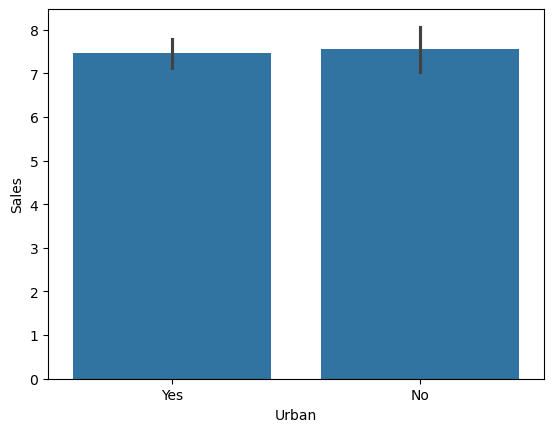

In [12]:
var = 'Urban'

sns.barplot(x=var, y=target, data = data)
plt.show()

2) 수치화 : t-test, anova

In [13]:
p = []
groups = ['Yes', 'No']
for i in groups:
    t=data.loc[data[var]==i, 'Sales']
    p.append(t)

spst.ttest_ind(*p)

TtestResult(statistic=-0.30765346670661126, pvalue=0.7585069603942775, df=398.0)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 매장의 위치는 평균 판매량에 크게 영향을 주지 않는다.  

### **(3) US-> Sales**

1) 시각화 : 평균비교 barplot

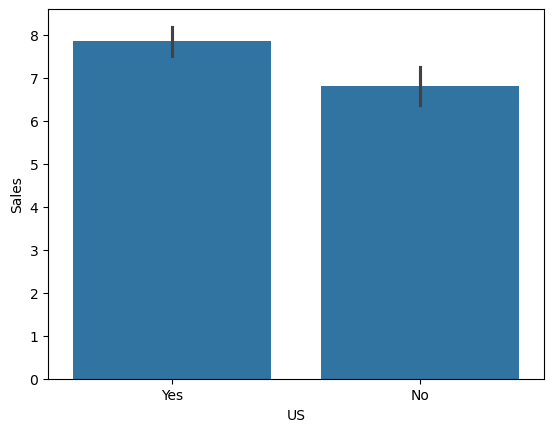

In [14]:
var = 'US'

sns.barplot(x=var, y=target, data = data)
plt.show()

2) 수치화 : t-test, anova

In [15]:
p = []
groups = ['Yes', 'No']
for i in groups:
    t=data.loc[data[var]==i, 'Sales']
    p.append(t)

spst.ttest_ind(*p)

TtestResult(statistic=3.589738747802499, pvalue=0.00037233958701471517, df=398.0)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

In [19]:
p = []
groups = data[var].unique()
for i in groups:
    t=data.loc[data[var]==i, 'Sales']
    p.append(t)

spst.ttest_ind(*p)

TtestResult(statistic=3.589738747802499, pvalue=0.00037233958701471517, df=398.0)

* 국내(미국 내) 매장과 글로벌 매장의 평균 판매량에 차이가 있음을 확인했다.  
* 글로벌이 판매량 부진을 겪고 있는데, 그 이유는 무엇일지 추가 분석이 필요해보인다.

## **4.관계 정리하기**

① 강한관계

In [ ]:
# Price_Diff, ShelveLoc

② 중간관계

In [ ]:
# Advertising, Price, Age, Income, US

③ 관계없음

In [ ]:
# Population, Urban